In [4]:
%tensorflow_version 2.x
import tensorflow as tf
!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

assert len(tf.config.list_physical_devices('GPU')) > 0

In [5]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
train_images.shape

(60000, 28, 28, 1)

In [9]:
train_labels.shape

(60000,)

In [10]:
test_images.shape

(10000, 28, 28, 1)

In [11]:
test_labels.shape

(10000,)

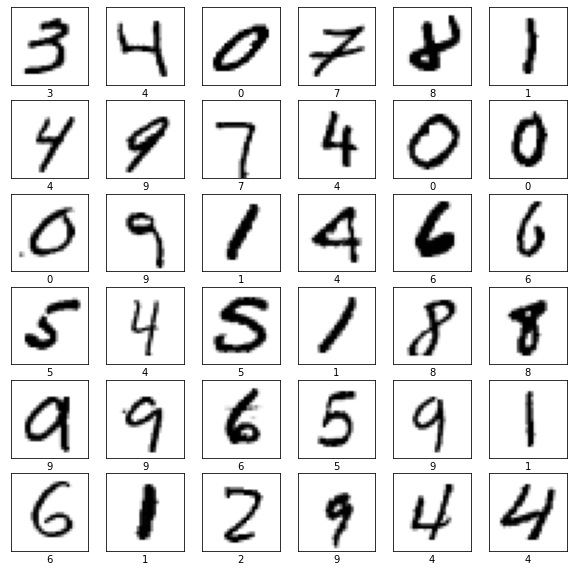

In [16]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])

In [17]:
# fully connected
def build_fc_model():
  fc_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")                                  
  ])
  return fc_model
model = build_fc_model()

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate=1e-1),
              metrics=['accuracy'])

* Loss function — This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.
* Optimizer — This defines how the model is updated based on the data it sees and its loss function.
* Metrics — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the accuracy, the fraction of the images that are correctly classified.

[spare_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy)

In [21]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 5s 2ms/step - loss: 0.3736 - accuracy: 0.8957
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2019 - accuracy: 0.9426
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1517 - accuracy: 0.9567
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1231 - accuracy: 0.9646
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1040 - accuracy: 0.9705


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9648
Test accuracy: 0.9648000001907349


[evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#evaluate)

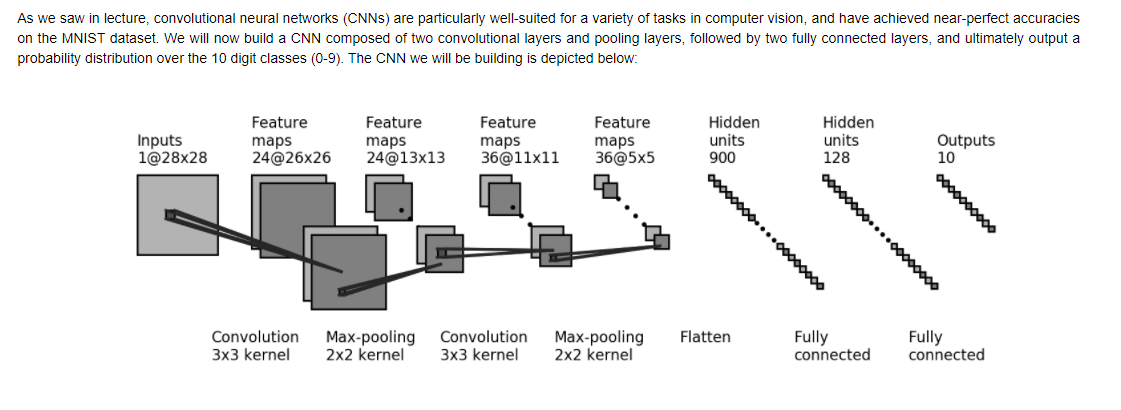

In [28]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")                                   
  ])
  return cnn_model

cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

[Conv2d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

[MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

In [37]:
cnn_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 5s 3ms/step - loss: 0.1825 - accuracy: 0.9456
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0561 - accuracy: 0.9826
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0396 - accuracy: 0.9879
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0300 - accuracy: 0.9904
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0233 - accuracy: 0.9926


In [38]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0393 - accuracy: 0.9872


In [39]:
print('Test accuracy: ', test_acc)

Test accuracy:  0.9872000217437744


In [40]:
predictions = cnn_model.predict(test_images)

In [42]:
prediction = cnn_model.

array([[6.3906791e-09, 3.6034734e-08, 6.4166493e-06, ..., 9.9994850e-01,
        2.9641591e-08, 5.8058333e-08],
       [2.5850042e-08, 4.3774770e-07, 9.9999940e-01, ..., 3.7415535e-12,
        4.9986710e-08, 3.4337651e-11],
       [2.9032176e-08, 9.9978560e-01, 3.1092031e-07, ..., 3.1950796e-05,
        5.9699636e-07, 9.8484009e-07],
       ...,
       [3.0672053e-12, 2.6881258e-10, 2.3836776e-11, ..., 8.6676166e-10,
        3.2445141e-07, 1.3831600e-08],
       [9.1972129e-07, 2.4781432e-09, 2.7772471e-09, ..., 5.1477655e-11,
        6.2175194e-04, 2.1002502e-09],
       [1.9327464e-07, 2.0793689e-10, 4.3004004e-08, ..., 2.3738135e-13,
        2.6370941e-07, 1.2087188e-10]], dtype=float32)

In [43]:
prediction = np.argmax(predictions[0])
print(prediction)

7


Label of this digit is: 7


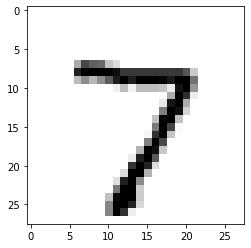

In [47]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

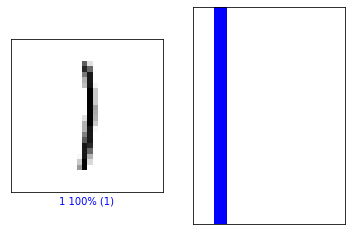

In [51]:
image_index = 40 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

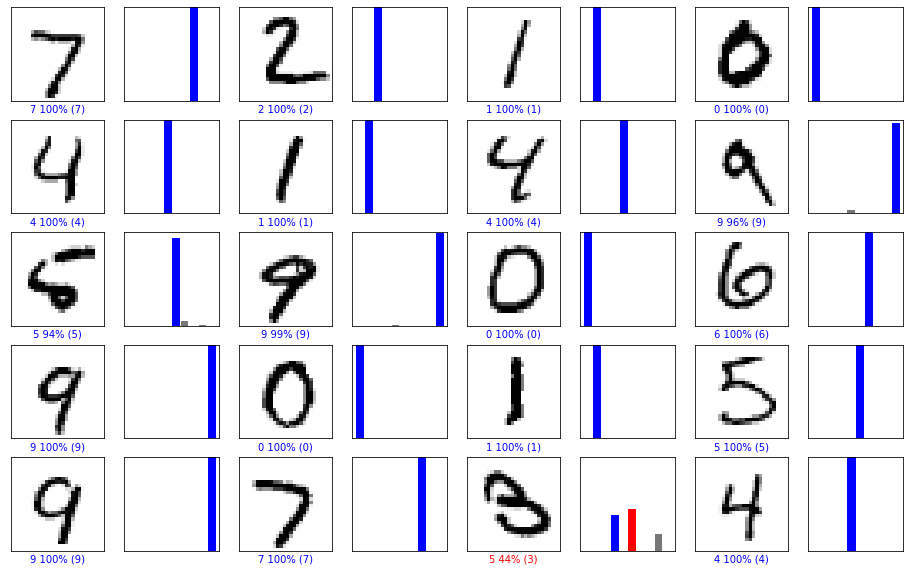

In [54]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

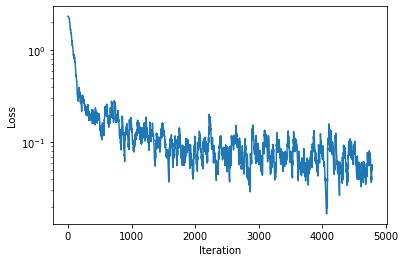

100%|██████████| 5000/5000 [00:39<00:00, 125.12it/s]


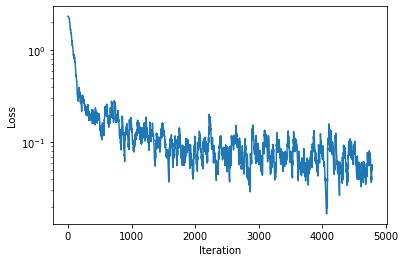

In [67]:
# rebuild cnn model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iteration',ylabel='Loss', scale='semilogy')
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2)

if hasattr(tqdm, '_instances'):tqdm._instances.clear()
for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)
  with tf.GradientTape() as tape:
    logits = cnn_model(images)
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
  
  loss_history.append(loss_value.numpy().mean())
  plotter.plot(loss_history.get())

  grads =tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))
